# Visualizing the Titanic Disaster

Data taken from [Kaggle](https://www.kaggle.com/c/titanic).  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
titanic = pd.read_excel("titanic.xls")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# EDA

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [24]:
sns.set(style="darkgrid")
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})

### Gender Proportion

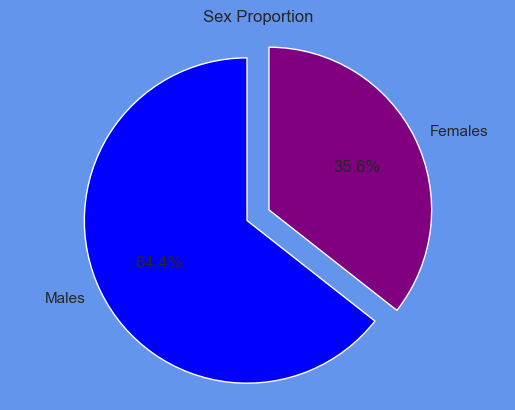

In [16]:
males = (titanic['sex'] == 'male').sum()
females = (titanic['sex'] == 'female').sum()

proportions = [males, females]

plt.pie(proportions, labels = ['Males', 'Females'], shadow = False, colors = ['blue','purple'], explode = (0.15 , 0),
    startangle = 90, autopct = '%1.1f%%')

plt.axis('equal')

plt.title("Sex Proportion")

plt.show()

### Fare payed by Age, for males and females

(-5.0, 85.0)

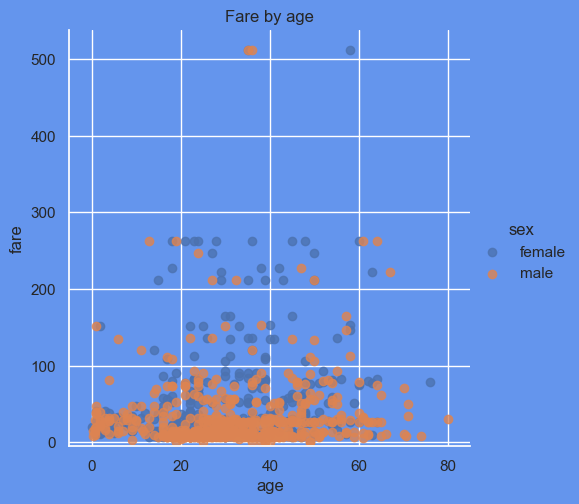

In [17]:
lm = sns.lmplot(x = 'age', y = 'fare', data = titanic, hue = 'sex', fit_reg=False)
lm.set(title = 'Fare by age')
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

### How many people survived?

In [19]:
titanic.survived.sum()

500

### Histogram of the fare payed

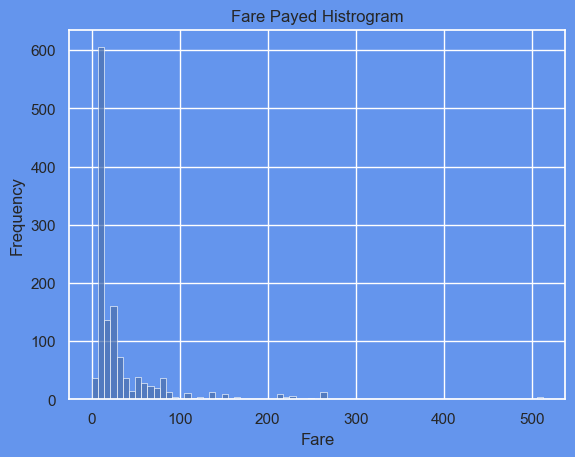

In [20]:
sns.histplot(titanic.fare, binwidth=7)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')
plt.show()

### pclass distribution as piechart

[]

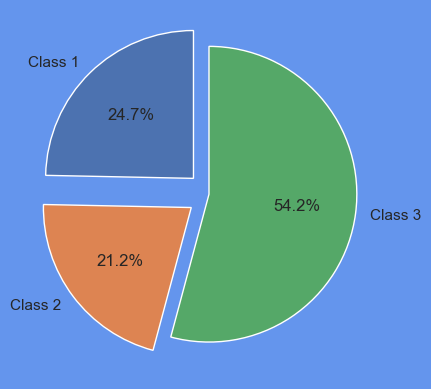

In [21]:
classes = titanic.groupby('pclass')['name'].count()
plt.pie(classes, labels = ['Class 1', 'Class 2', 'Class 3'], shadow = False, explode = (0.15 , 0.15, 0), startangle = 90, autopct = '%1.1f%%')
plt.plot()

### What is the best class? Let's correlate with fare payed.

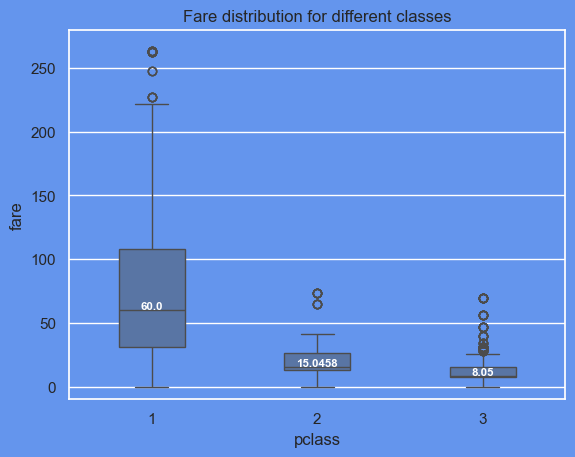

In [28]:
box_plot = sns.boxplot(data=titanic, x='pclass', y='fare', width=0.4)
plt.ylim(-10, 280)
plt.title('Fare distribution for different classes')
medians = titanic.groupby(['pclass'])['fare'].median()
vertical_offset = titanic['fare'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick+1] + vertical_offset,medians[xtick+1], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')
plt.show()

### How is age distributed in every pclass and in every age?

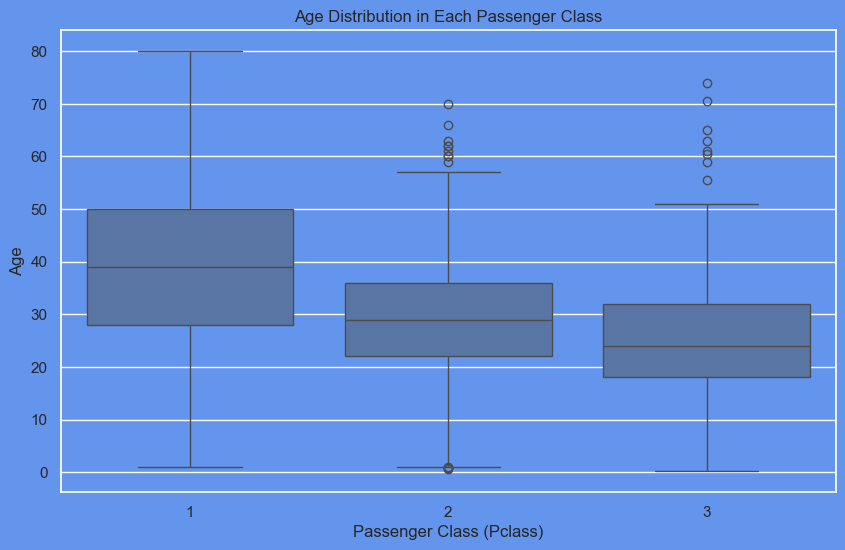

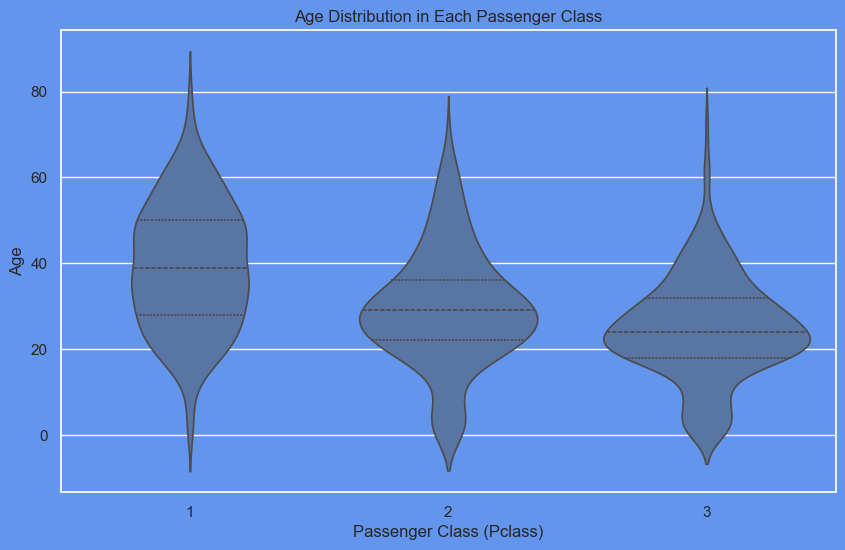

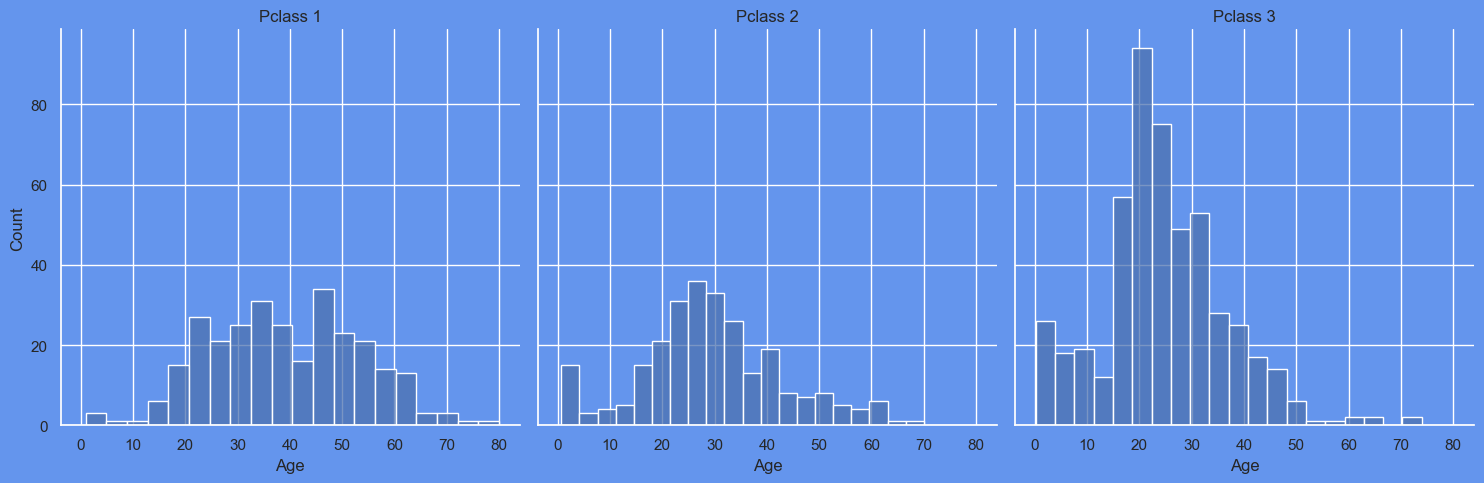

D:\Programs\miniconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
D:\Programs\miniconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
D:\Programs\miniconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


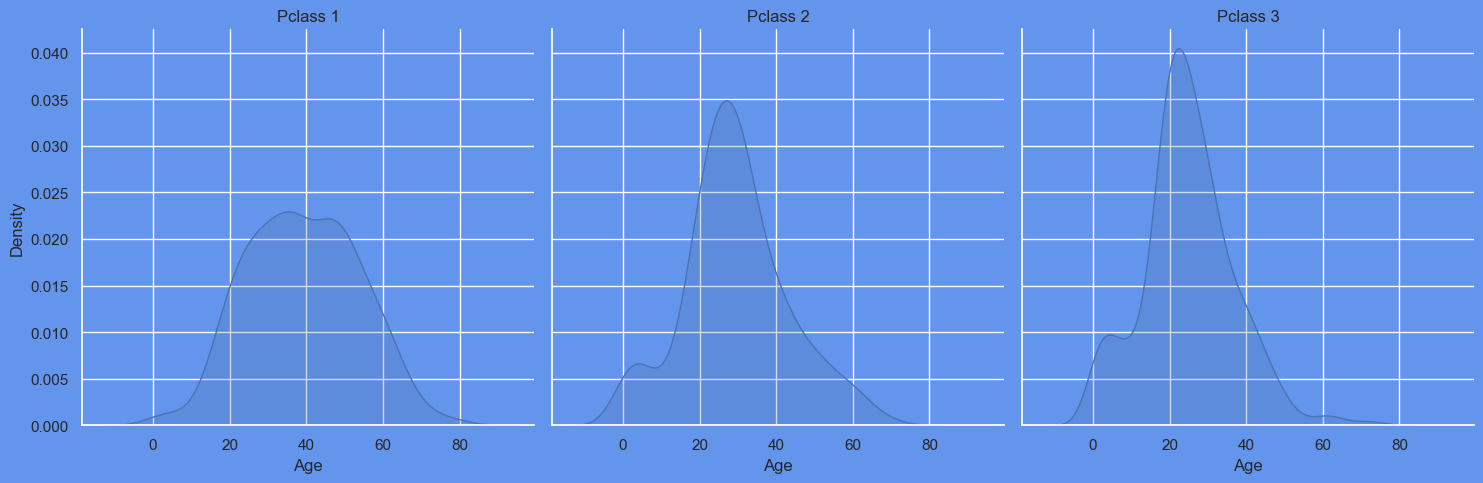

In [25]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='age', data=titanic)
plt.title('Age Distribution in Each Passenger Class')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='pclass', y='age', data=titanic, inner='quartile')
plt.title('Age Distribution in Each Passenger Class')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Age')
plt.show()

g = sns.FacetGrid(titanic, col='pclass', height=5, aspect=1)
g.map(sns.histplot, 'age', bins=20, kde=False)
g.set_axis_labels('Age', 'Count')
g.set_titles('Pclass {col_name}')
plt.show()

g = sns.FacetGrid(titanic, col='pclass', height=5, aspect=1)
g.map(sns.kdeplot, 'age', shade=True)
g.set_axis_labels('Age', 'Density')
g.set_titles('Pclass {col_name}')
plt.show()

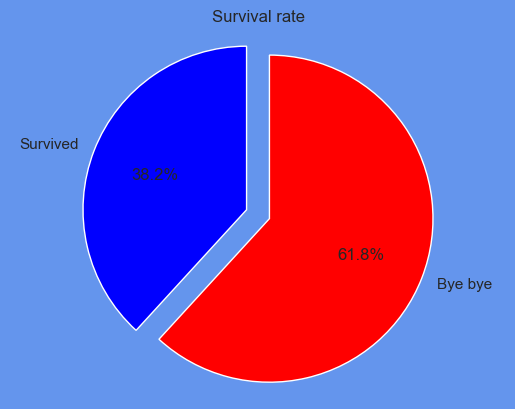

In [26]:
males = (titanic['survived'] == 1).sum()
females = (titanic['survived'] == 0).sum()

proportions = [males, females]

plt.pie(proportions, labels = ['Survived', 'Bye bye'], shadow = False, colors = ['blue','red'], explode = (0.15 , 0),
    startangle = 90, autopct = '%1.1f%%')

plt.axis('equal')

plt.title("Survival rate")

plt.show()

### Which family had lost the most members?

In [32]:
titanic['family_name'] = titanic.name.str.split(',').str[0]

In [33]:
((titanic.groupby('family_name')['survived'].count() - titanic.groupby('family_name')['survived'].sum()).rename('ded').sort_values(ascending=False) / titanic.groupby('family_name')['survived'].count()).sort_values(ascending=False)

family_name
Abbing         1.0
Loring         1.0
McCrie         1.0
McEvoy         1.0
McKane         1.0
              ... 
Masselmani     0.0
Sagesser       0.0
Duquemin       0.0
Salkjelsvik    0.0
Leitch         0.0
Length: 875, dtype: float64

In [34]:
(titanic.groupby('family_name')['survived'].count() - titanic.groupby('family_name')['survived'].sum()).rename('ded').sort_values(ascending=False)

family_name
Sage             11
Andersson         9
Goodwin           8
Ford              6
Skoog             6
                 ..
Oliva y Ocana     0
Ohman             0
Duquemin          0
O'Leary           0
Leitch            0
Name: ded, Length: 875, dtype: int64

## connection between family size to number of survivers:

### family sizes histogram:

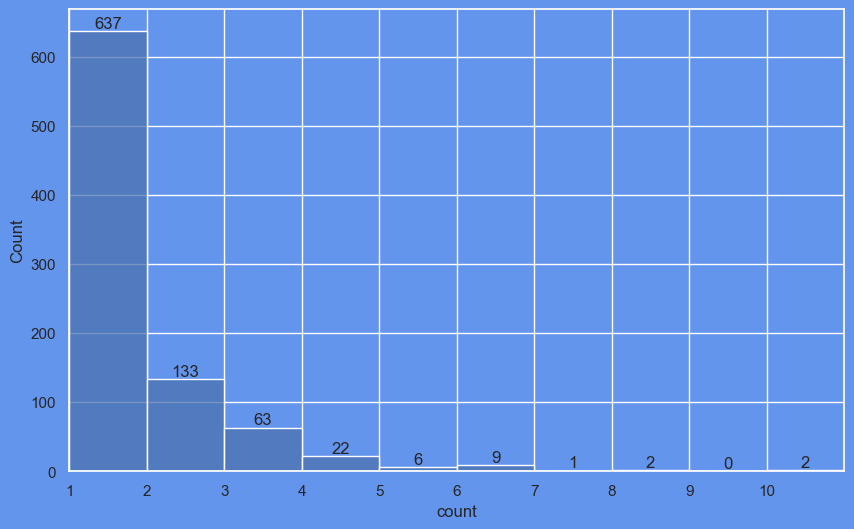

In [67]:
plt.figure(figsize=(10, 6))
fig = sns.histplot(titanic["family_name"].value_counts(), binwidth=1)
fig.bar_label(fig.containers[0])
plt.xticks(range(1,11))
plt.xlim(1,11)
plt.show()

In [75]:
titanic["family_count"] = titanic.groupby(['family_name'])['survived'].transform('count')
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,family_name,family_count
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,4
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,4
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,4
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,Zabour,2
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,Zabour,2
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,Zakarian,2
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,Zakarian,2


In [78]:
titanic.groupby("family_name")["survived"].mean()

family_name
Abbing           0.000000
Abbott           0.333333
Abelseth         1.000000
Abelson          0.500000
Abrahamsson      1.000000
                   ...   
de Mulder        1.000000
de Pelsmaeker    0.000000
del Carlo        0.500000
van Billiard     0.000000
van Melkebeke    0.000000
Name: survived, Length: 875, dtype: float64

### Is there a connection between the age of a passenger and it's chance of survival? What about his pclass?

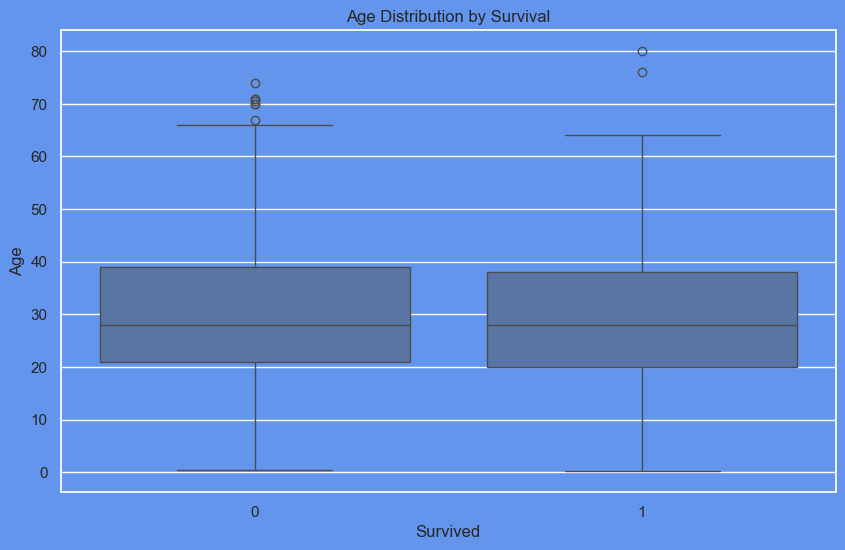

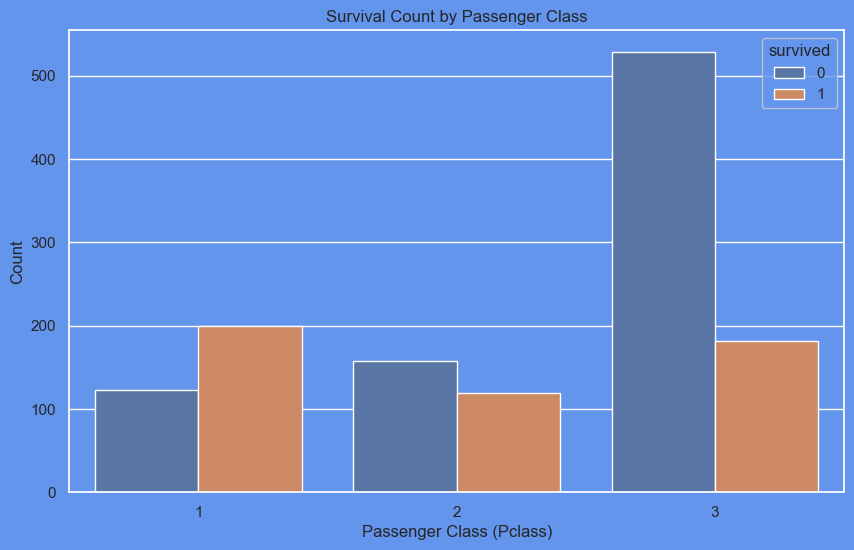

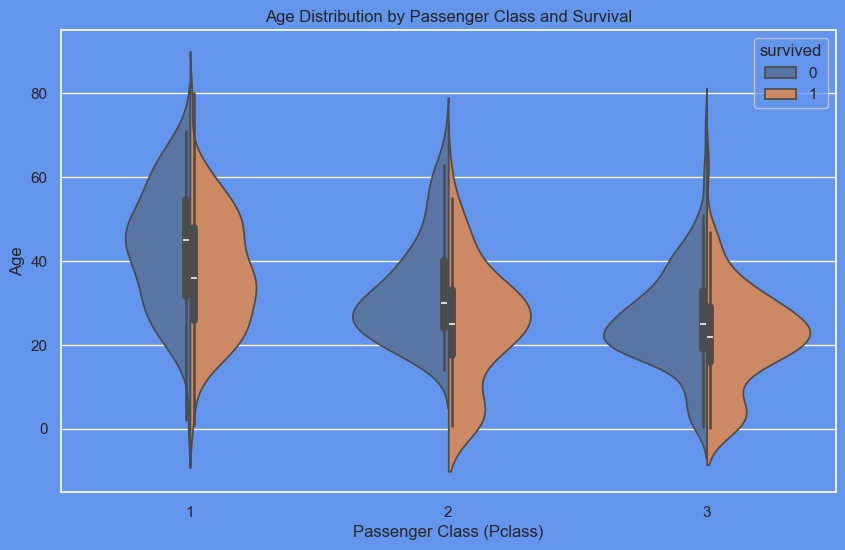

In [29]:
# Age vs Survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='age', data=titanic)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Pclass vs Survival
plt.figure(figsize=(10, 6))
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Count')
plt.show()

# Age and Pclass vs Survival
plt.figure(figsize=(10, 6))
sns.violinplot(x='pclass', y='age', hue='survived', data=titanic, split=True)
plt.title('Age Distribution by Passenger Class and Survival')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Age')
plt.show()

### What is the relation between survivors to deceased in every pclass?

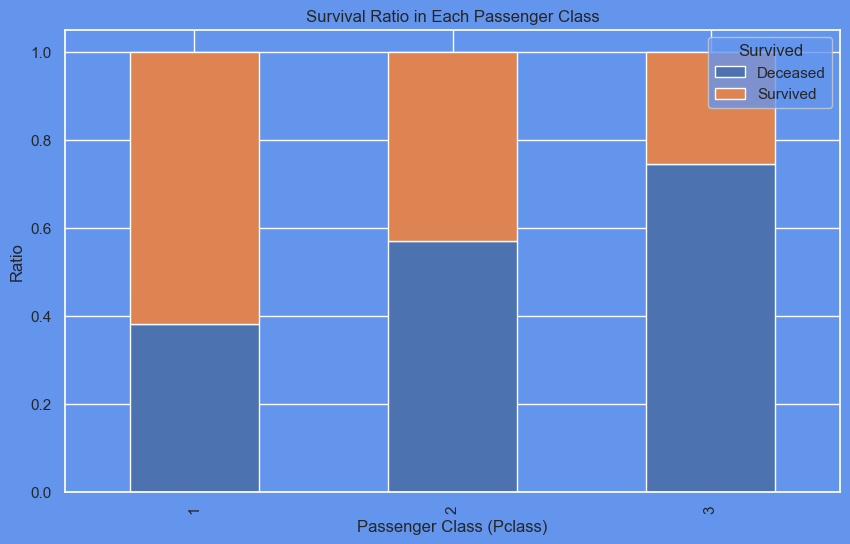

In [30]:
# Calculate the survival ratio in each Pclass
survival_ratio = titanic.groupby('pclass')['survived'].value_counts(normalize=True).unstack().fillna(0)

# Plot the survival ratio in each Pclass
survival_ratio.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Survival Ratio in Each Passenger Class')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Ratio')
plt.legend(title='Survived', labels=['Deceased', 'Survived'])
plt.show()

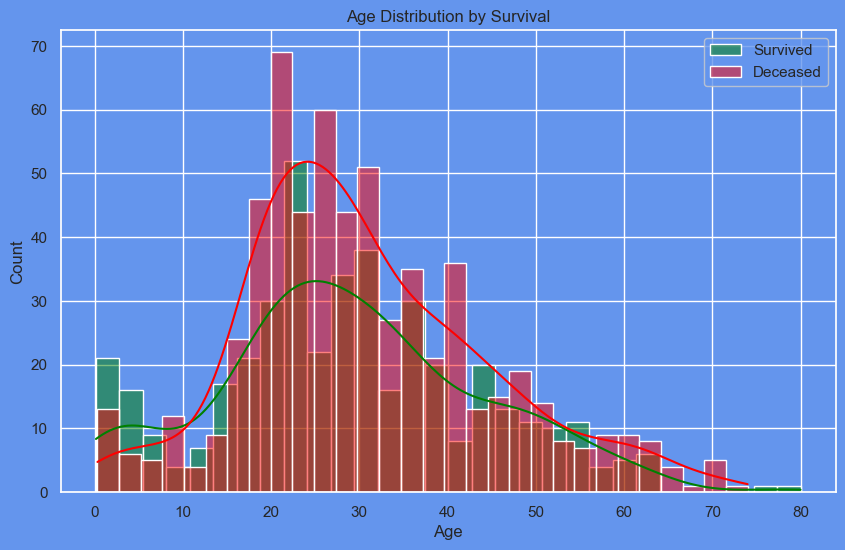

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic[titanic['survived'] == 1]['age'], bins=30, kde=True, color='green', label='Survived')
sns.histplot(titanic[titanic['survived'] == 0]['age'], bins=30, kde=True, color='red', label='Deceased')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

In [76]:
titanic['age_group'] = titanic['age'].apply(lambda x: 'child' if x <= 16 else 'adult')
print(titanic['age_group'].value_counts())

age_group
adult    1175
child     134
Name: count, dtype: int64


In [77]:
age_group_survival = titanic.groupby('age_group')['survived'].mean()
print(age_group_survival)

age_group
adult    0.362553
child    0.552239
Name: survived, dtype: float64


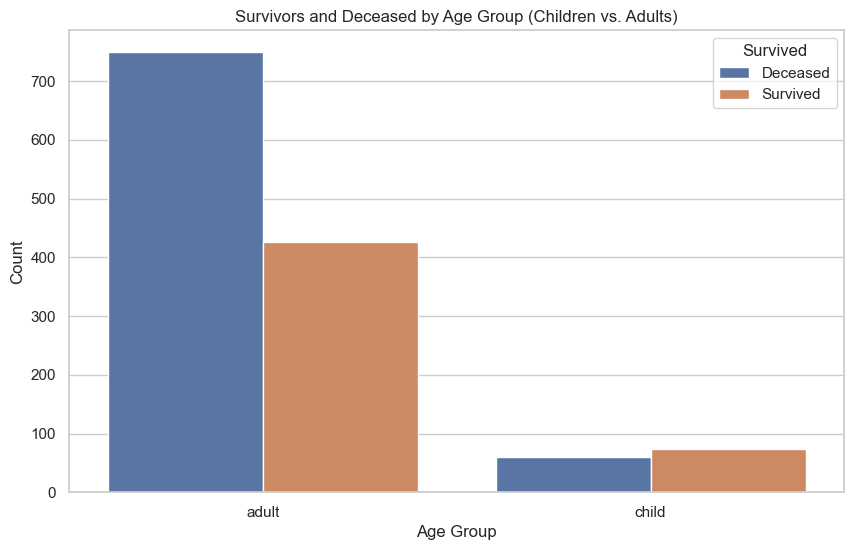

In [79]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='survived', data=titanic)
plt.title('Survivors and Deceased by Age Group (Children vs. Adults)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Deceased', 'Survived'])
plt.show()

### what is the proportion of men and women who survived?

In [87]:
gender_survival_rate = titanic.groupby('sex')['survived'].mean()

# Calculate the count of survivors and deceased for each gender
gender_survival_count = titanic.groupby(['sex', 'survived']).size().unstack().fillna(0)
gender_survival_count.columns = ['Deceased', 'Survived']

print("Survival rates:")
print(gender_survival_rate)
print('\n')
print("Total loss")
print(gender_survival_count)


Survival rates:
sex
female    0.727468
male      0.190985
Name: survived, dtype: float64


Total loss
        Deceased  Survived
sex                       
female       127       339
male         682       161


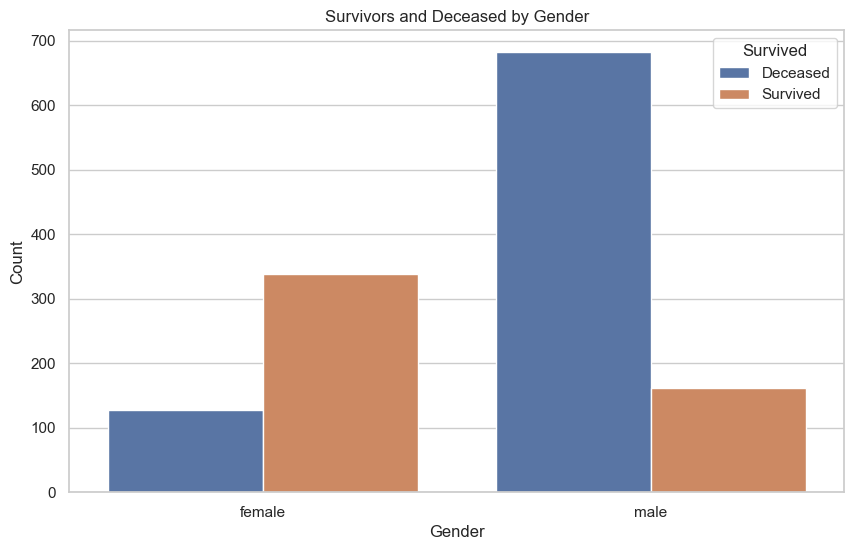

In [89]:
# Count plot of survivors and deceased by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('Survivors and Deceased by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Deceased', 'Survived'])
plt.show()

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [120]:
titanic_dummies = pd.get_dummies(titanic[['sex', 'pclass', 'embarked']], drop_first=True)
titanic_dummies['age'] = titanic['age']
titanic_dummies['fare'] = titanic['fare']
titanic_dummies['survived'] = titanic['survived']

X = titanic_dummies.drop('survived', axis=1)
y = titanic_dummies['survived']

In [118]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,family_name,age_group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,child
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,child
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN,Youseff,adult
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,Zabour,child
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,Zakarian,adult
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,Zakarian,adult


In [117]:
titanic.dropna(subset=['survived', 'fare', 'embarked'], inplace=True)

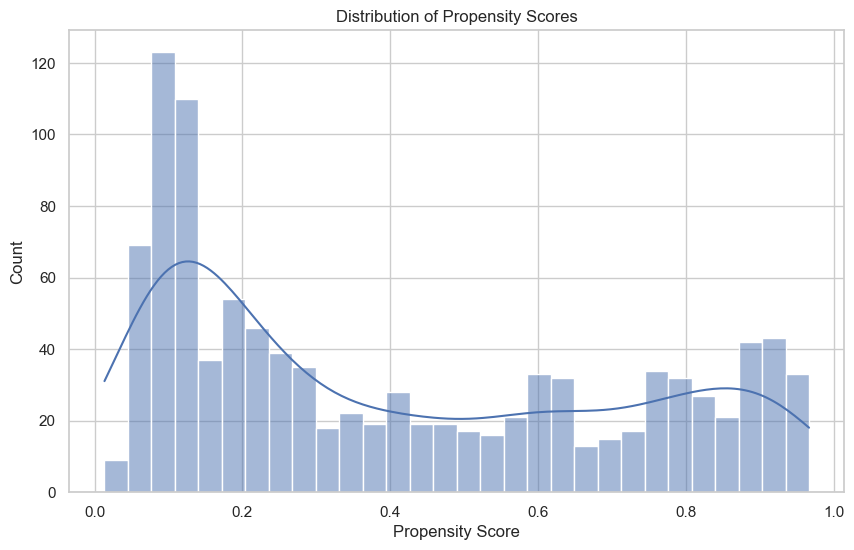

In [121]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit a logistic regression model to calculate propensity scores
log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)
titanic_dummies['propensity_score'] = log_reg.predict_proba(X_scaled)[:, 1]

# Check the distribution of propensity scores
plt.figure(figsize=(10, 6))
sns.histplot(titanic_dummies['propensity_score'], bins=30, kde=True)
plt.title('Distribution of Propensity Scores')
plt.xlabel('Propensity Score')
plt.ylabel('Count')
plt.show()

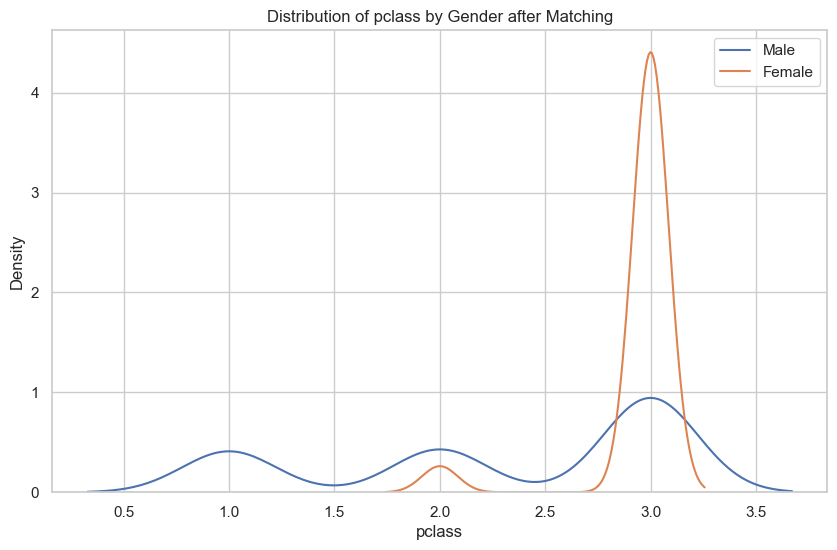

C:\Users\edeng\AppData\Local\Temp\ipykernel_25964\3760023203.py:23: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(matched_data[matched_data['sex_male'] == 1][column], label='Male')
C:\Users\edeng\AppData\Local\Temp\ipykernel_25964\3760023203.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(matched_data[matched_data['sex_male'] == 0][column], label='Female')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


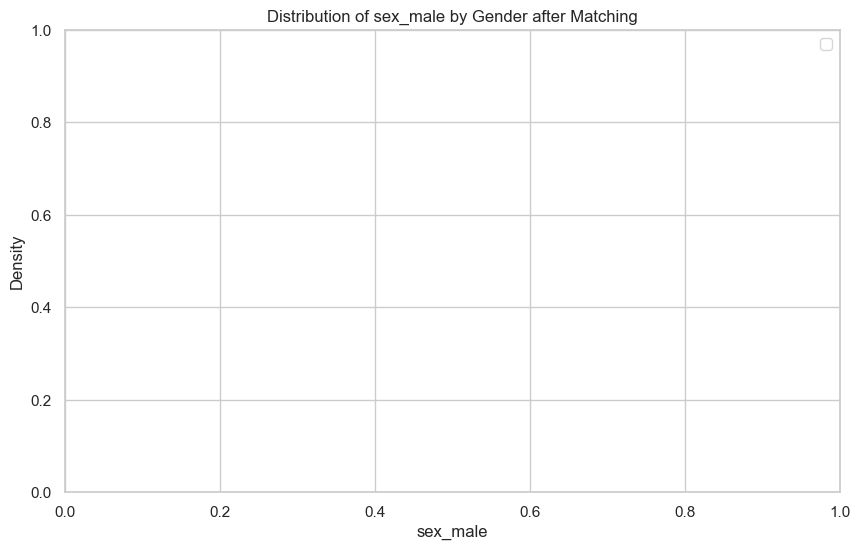

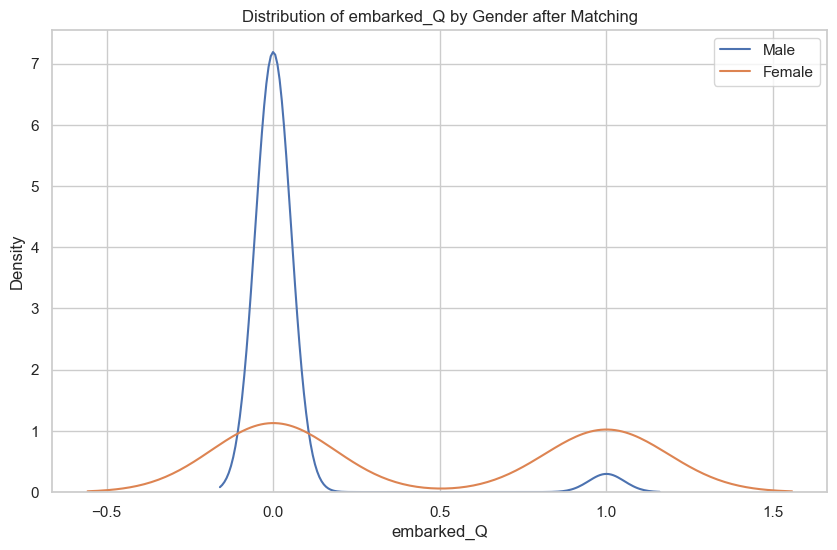

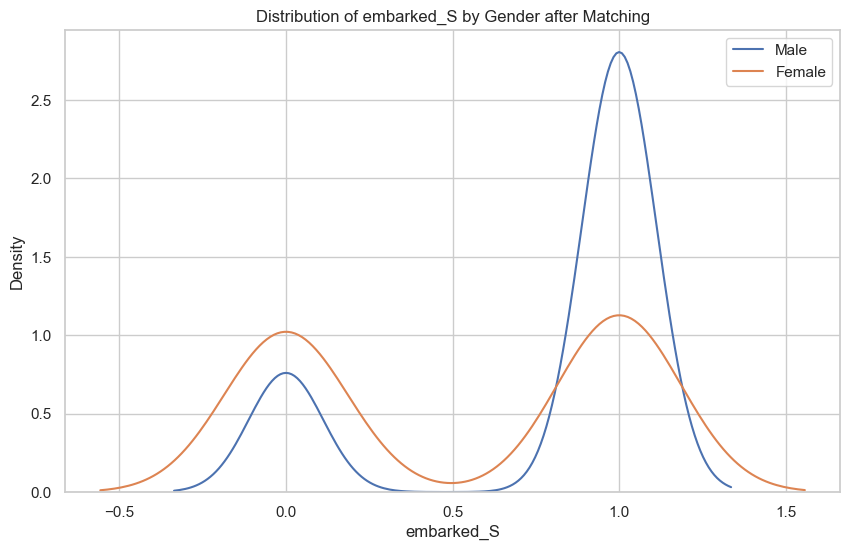

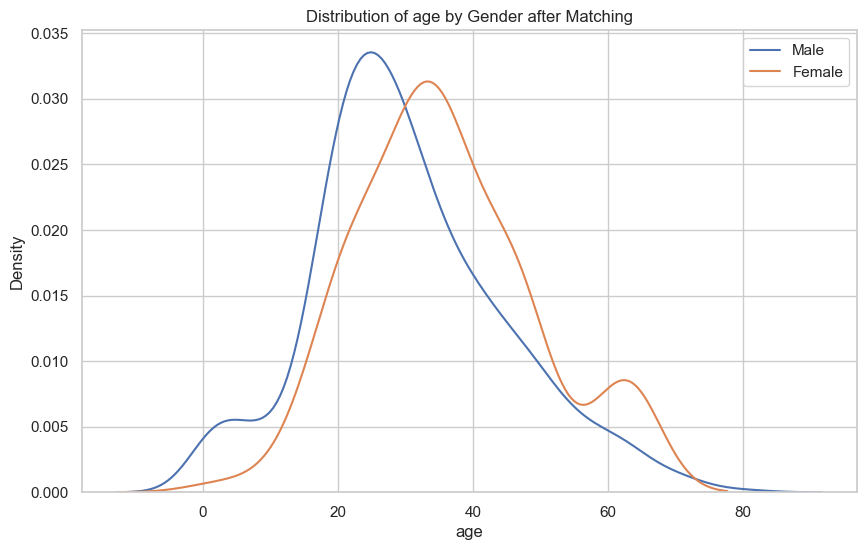

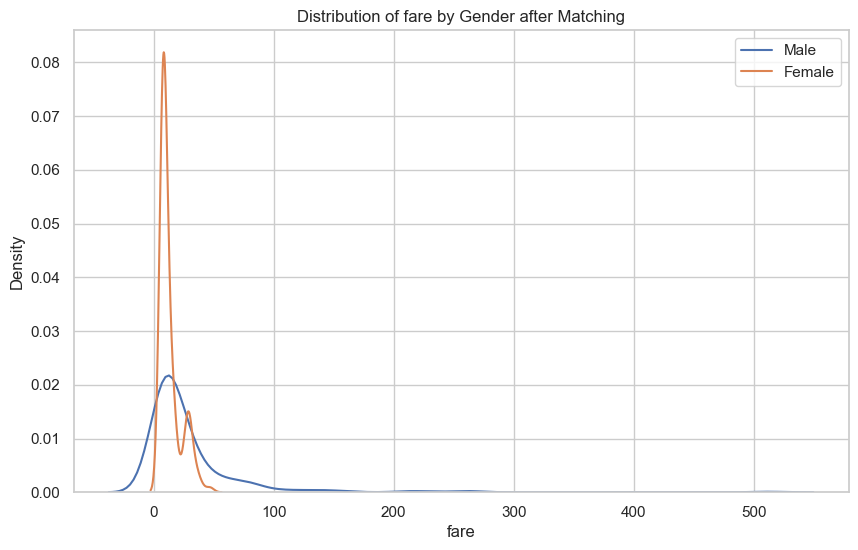

In [122]:
# Define a function to perform propensity score matching
def propensity_score_matching(df, propensity_col, treatment_col, caliper=0.01):
    treated = df[df[treatment_col] == 1]
    control = df[df[treatment_col] == 0]
    
    matched_control_indices = []
    for i, row in treated.iterrows():
        potential_matches = control[np.abs(control[propensity_col] - row[propensity_col]) <= caliper]
        if not potential_matches.empty:
            matched_control_index = potential_matches.sample(1).index[0]
            matched_control_indices.append(matched_control_index)
    
    matched_control = control.loc[matched_control_indices]
    matched = pd.concat([treated, matched_control])
    return matched

# Perform propensity score matching
matched_data = propensity_score_matching(titanic_dummies, 'propensity_score', 'sex_male')

# Check the balance of covariates after matching
for column in X.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(matched_data[matched_data['sex_male'] == 1][column], label='Male')
    sns.kdeplot(matched_data[matched_data['sex_male'] == 0][column], label='Female')
    plt.title(f'Distribution of {column} by Gender after Matching')
    plt.legend()
    plt.show()


sex_male
False    0.398601
True     0.205479
Name: survived, dtype: float64


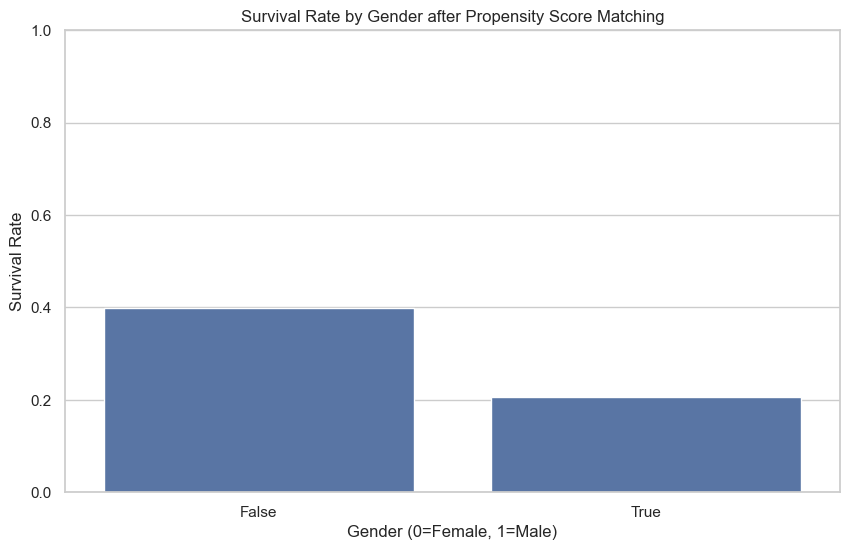

In [123]:
# Calculate the survival rate for matched data
survival_rate_by_gender = matched_data.groupby('sex_male')['survived'].mean()
print(survival_rate_by_gender)

# Bar plot of survival rate by gender after matching
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rate_by_gender.index, y=survival_rate_by_gender.values)
plt.title('Survival Rate by Gender after Propensity Score Matching')
plt.xlabel('Gender (0=Female, 1=Male)')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()
